In [1]:
from web3 import Web3, HTTPProvider
import json

# Connect to the network
web3 = Web3(HTTPProvider('http://localhost:8545'))

# Get contract signature
with open('build/contracts/Energy.json') as energy_file:    
    energy_json = json.load(energy_file)
energy_abi = energy_json['abi']
network_id = energy_json['networks'].keys()[-1]
energy_address = energy_json['networks'][network_id]['address']

# List accounts and set default account
account = web3.eth.accounts
web3.eth.defaultAccount = account[0]

In [2]:
contract = web3.eth.contract(energy_abi, energy_address)
contract_filter = contract.on('addedRessource', filter_params={'fromBlock': 'earliest'})

In [3]:
# trans_hash = contract.transact({'to': energy_address, 'gas': 90000}).addConsumptionToken(account[0], 10000)
# web3.eth.getTransactionReceipt(trans_hash)

In [4]:
# contract.call().consumptionTokenBalance(account[0])

In [5]:
contract_filter.get(only_changes=False)

[{'address': u'0xf6f18358aa8b161f62f1b7541888e5055305976a',
  'args': {u'_target': u'0x5c5916b4e1f050c72faa8766fab936bcc3b8bf6c',
   u'_value': 257},
  'blockHash': u'0x2a66a3ec88765b8e95f046f581227dd09bf69d92232a568a0a0475cedfadebcc',
  'blockNumber': 8,
  'event': u'addedRessource',
  'logIndex': 0,
  'transactionHash': u'0xb1912c9fc29a79fa6fde506a939c36dcc56e30e895a08e1236ecb208de4106e6',
  'transactionIndex': 0},
 {'address': u'0xf6f18358aa8b161f62f1b7541888e5055305976a',
  'args': {u'_target': u'0x5c5916b4e1f050c72faa8766fab936bcc3b8bf6c',
   u'_value': 185},
  'blockHash': u'0xdfa8102963c0ef42b52a27637b5928175ce3040527dd4a0dc032893c02f0e53a',
  'blockNumber': 9,
  'event': u'addedRessource',
  'logIndex': 0,
  'transactionHash': u'0x61d4cb6f329a9b60c4d2be9cb81eb42c695156233440cf78938767cb09cfd4a8',
  'transactionIndex': 0},
 {'address': u'0xf6f18358aa8b161f62f1b7541888e5055305976a',
  'args': {u'_target': u'0x5c5916b4e1f050c72faa8766fab936bcc3b8bf6c',
   u'_value': 396},
  'block

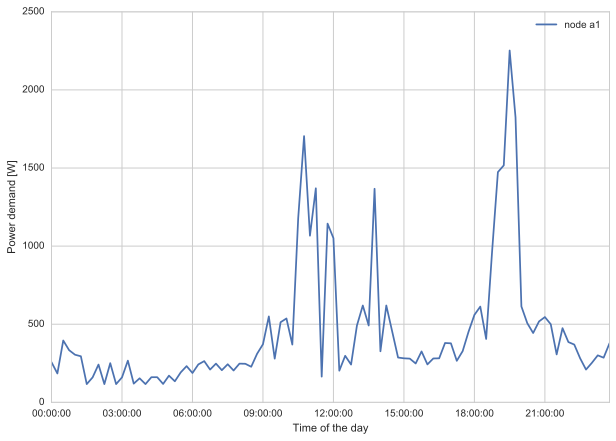

In [7]:
# Plot blockchain data
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("whitegrid")
seaborn.despine()
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

time_step = 15  # minutes
data = contract_filter.get(only_changes=False)
x = pandas.date_range('2017-09-21 00:00:00', periods=len(data), freq='15T')
y = [block['args']['_value'] for block in data]

# Create plot
plt.figure(figsize=(10, 7), dpi=200)
plt.plot(x, y, label='node a1')
plt.xlabel('Time of the day')
plt.ylabel('Power demand [W]')
plt.legend(loc=0)
plt.show()